## Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/diabetes.csv

In [ ]:
import pandas as pd
import numpy as np
import mlrose
import time
df = pd.read_csv('diabetes.csv')

In [163]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [164]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

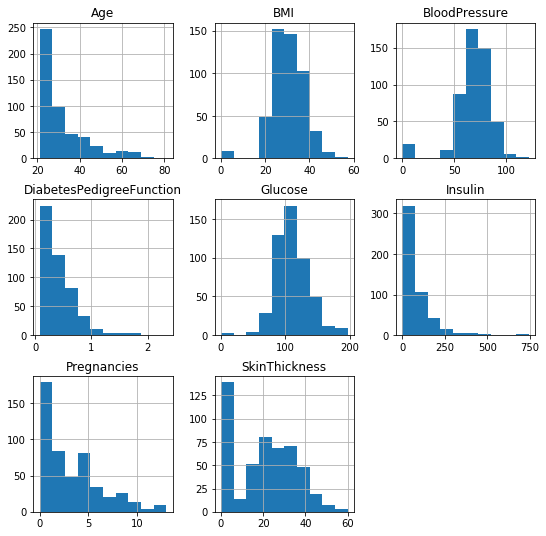

In [165]:
df[df['Outcome']==0].groupby('Outcome').hist(figsize=(9, 9))

Outcome
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

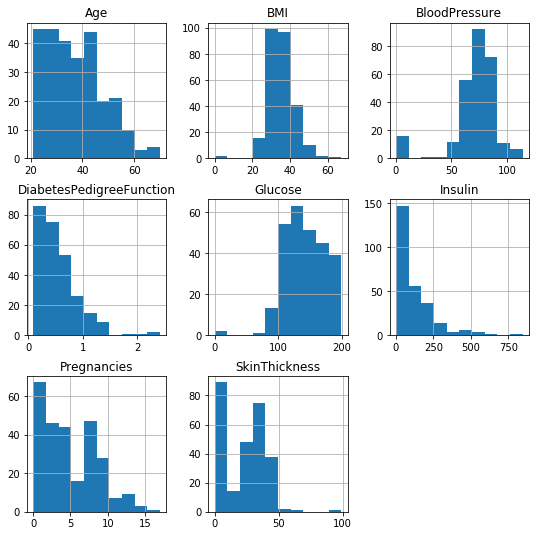

In [166]:
df[df['Outcome']==1].groupby('Outcome').hist(figsize=(9, 9))

In [167]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [168]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [169]:
df_clean = df[(df.Glucose != 0)]
df_clean.shape 

(763, 9)

In [170]:
df_clean = df_clean[(df.BloodPressure != 0)]
df_clean.shape 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(728, 9)

In [171]:
df_clean = df_clean[(df.BMI != 0)]
df_clean.shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(724, 9)

In [172]:
RANDOM_STATE = 903434960

In [173]:
X = df_clean.drop(['Outcome'], axis=1)
Y = df_clean['Outcome'].values

In [174]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=RANDOM_STATE)

In [204]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict

In [205]:
def classification_metrics(Y_pred, Y_true):
    #NOTE: It is important to provide the output in the same order
    return (accuracy_score(Y_true, Y_pred),
            roc_auc_score(Y_true, Y_pred),
            precision_score(Y_true, Y_pred),
            recall_score(Y_true, Y_pred),
            f1_score(Y_true, Y_pred))

In [206]:
def plot_PR(Y_pred,Y_test):
    average_precision = average_precision_score(Y_test, Y_pred)
    precision, recall, _ = precision_recall_curve(Y_test, Y_pred)
    plt.step(recall, precision, color='b', alpha=0.2,where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [207]:
def display_metrics(classifireName, Y_pred, Y_true):
    print("______________________________________________")
    print("Classifier: "+classifireName)
    acc, auc_, precision, recall, f1score = classification_metrics(Y_pred, Y_true)
    print("Accuracy: "+str(acc))
    print("ROC AUC: "+str(auc_))
    print("Precision: "+str(precision))
    print("Recall: "+str(recall))
    print("F1-score: "+str(f1score))
    print("______________________________________________")
    print("")

In [208]:
def plot_ROC(Y_pred, Y_test):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    # for i in range(n_classes):
    fpr, tpr, _ = roc_curve(Y_test, Y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 3 #Line Width
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [209]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

class_names = ['Positive', 'Negative']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

train time: 0.0004982948303222656
Training accuracy:  0.6251920122887865
test time: 0.0012478828430175781
Test accuracy:  0.6575342465753424
______________________________________________
Classifier: nn_model_RandomHillClimb
Accuracy: 0.6575342465753424
ROC AUC: 0.6277777777777778
Precision: 0.56
Recall: 0.5
F1-score: 0.5283018867924528
______________________________________________



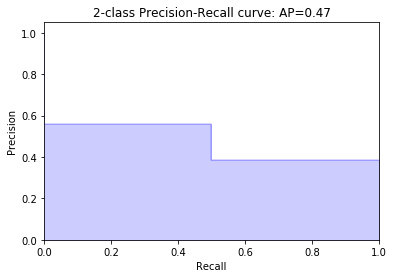

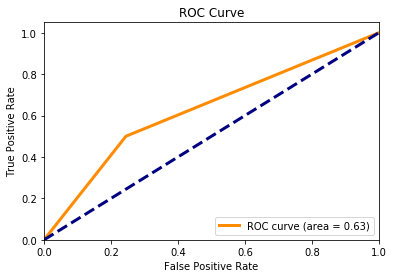

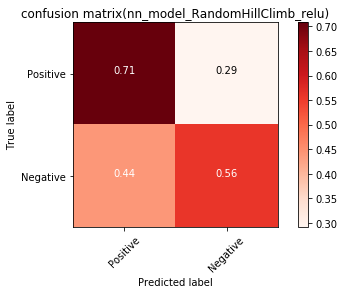

In [175]:
nn_model_RandomHillClimb = mlrose.NeuralNetwork(hidden_nodes = [8,8], activation = 'relu',
                                 algorithm = 'random_hill_climb', max_iters = 5000,
                                 bias = True, is_classifier = True, learning_rate = 0.01,
                                 early_stopping = True, clip_max = 20, max_attempts = 1000)

nn_model_RandomHillClimb.fit(X_train, Y_train)

# Predict labels for train set and assess accuracy
t0 = time.time()
y_train_pred = nn_model_RandomHillClimb.predict(X_train)
print('train time:', time.time()-t0)
y_train_pred = np.asarray([y[0] for y in y_train_pred])
y_train_accuracy = accuracy_score(Y_train, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
t0 = time.time()
y_test_pred = nn_model_RandomHillClimb.predict(X_test)
print('test time:', time.time()-t0)
y_test_pred = np.asarray([y[0] for y in y_test_pred])
y_test_accuracy = accuracy_score(Y_test, y_test_pred)

print('Test accuracy: ', y_test_accuracy)
display_metrics('nn_model_RandomHillClimb', y_test_pred, Y_test)
plot_PR(y_test_pred, Y_test)
plot_ROC(y_test_pred, Y_test)
cnf_matrix = confusion_matrix(y_test_pred,Y_test)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='confusion matrix('+name+')')
plt.show()

train time: 2.817326068878174
Training accuracy:  0.5038402457757296
test time: 0.0009059906005859375
Test accuracy:  0.5342465753424658
______________________________________________
Classifier: nn_model_SimulatedAnnealing
Accuracy: 0.5342465753424658
ROC AUC: 0.5412698412698412
Precision: 0.42105263157894735
Recall: 0.5714285714285714
F1-score: 0.48484848484848486
______________________________________________



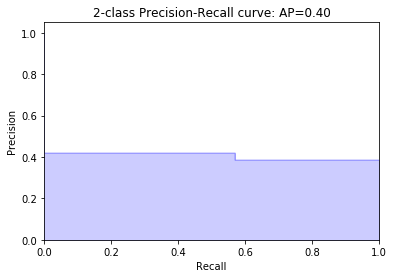

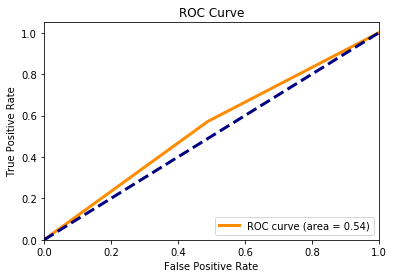

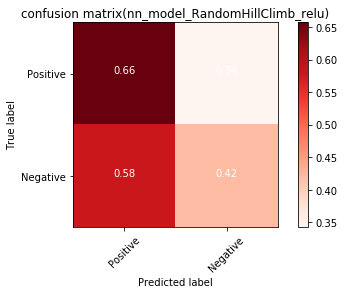

In [185]:
nn_model_SimulatedAnnealing = mlrose.NeuralNetwork(hidden_nodes = [24], activation = 'tanh',
                                 algorithm = 'simulated_annealing', max_iters = 1000,
                                 bias = True, is_classifier = True, learning_rate = 0.0001,
                                 early_stopping = True, clip_max = 5, max_attempts = 1000)

t0 = time.time()
nn_model_SimulatedAnnealing.fit(X_train, Y_train)
print('train time:', time.time()-t0)
# Predict labels for train set and assess accuracy
y_train_pred = nn_model_SimulatedAnnealing.predict(X_train)
y_train_pred = np.asarray([y[0] for y in y_train_pred])

y_train_accuracy = accuracy_score(Y_train, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
t0 = time.time()
y_test_pred = nn_model_SimulatedAnnealing.predict(X_test)
print('test time:', time.time()-t0)
y_test_pred = np.asarray([y[0] for y in y_test_pred])

y_test_accuracy = accuracy_score(Y_test, y_test_pred)

print('Test accuracy: ', y_test_accuracy)

display_metrics('nn_model_SimulatedAnnealing', y_test_pred, Y_test)
plot_PR(y_test_pred, Y_test)
plot_ROC(y_test_pred, Y_test)
cnf_matrix = confusion_matrix(y_test_pred, Y_test)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='confusion matrix('+name+')')
plt.show()

train time: 478.03867077827454
Training accuracy:  0.6451612903225806
test time: 0.0005741119384765625
Test accuracy:  0.6164383561643836
______________________________________________
Classifier: nn_model_GeneticAlgo
Accuracy: 0.6164383561643836
ROC AUC: 0.5202380952380953
Precision: 0.5
Recall: 0.10714285714285714
F1-score: 0.17647058823529413
______________________________________________



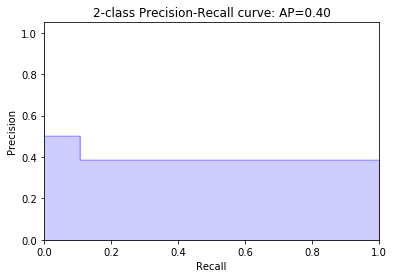

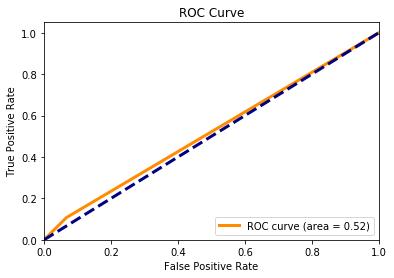

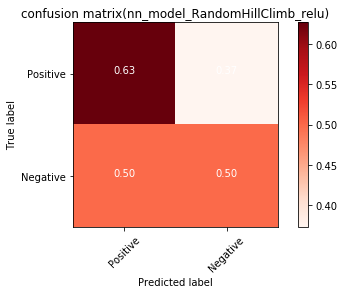

In [203]:
nn_model_GeneticAlgo = mlrose.NeuralNetwork(hidden_nodes = [16], activation = 'tanh',
                                 algorithm = 'genetic_alg', max_iters = 2000,
                                 bias = True, is_classifier = True, learning_rate = 0.0001,
                                 early_stopping = True, clip_max = 10, max_attempts = 2000)
t0 = time.time()
nn_model_GeneticAlgo.fit(X_train, Y_train)
print('train time:', time.time()-t0)
# Predict labels for train set and assess accuracy
y_train_pred = nn_model_GeneticAlgo.predict(X_train)
y_train_pred = np.asarray([y[0] for y in y_train_pred])


y_train_accuracy = accuracy_score(Y_train, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
t0 = time.time()
y_test_pred = nn_model_GeneticAlgo.predict(X_test)
print('test time:', time.time()-t0)
y_test_pred = np.asarray([y[0] for y in y_test_pred])
y_test_accuracy = accuracy_score(Y_test, y_test_pred)

print('Test accuracy: ', y_test_accuracy)

display_metrics('nn_model_GeneticAlgo', y_test_pred, Y_test)
plot_PR(y_test_pred, Y_test)
plot_ROC(y_test_pred, Y_test)
cnf_matrix = confusion_matrix(y_test_pred, Y_test)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='confusion matrix('+name+')')
plt.show()

/usr/local/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/usr/local/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))
/usr/local/lib/python3.7/site-packages/mlrose/activation.py:77: RuntimeWarning: overflow encountered in exp
  fx = 1/(1 + np.exp(-x))


train time: 21.12565588951111
Training accuracy:  0.6927803379416283
test time: 0.0007369518280029297
Test accuracy:  0.6986301369863014
______________________________________________
Classifier: nn_model_GradientDescent
Accuracy: 0.6986301369863014
ROC AUC: 0.6138888888888888
Precision: 0.875
Recall: 0.25
F1-score: 0.3888888888888889
______________________________________________



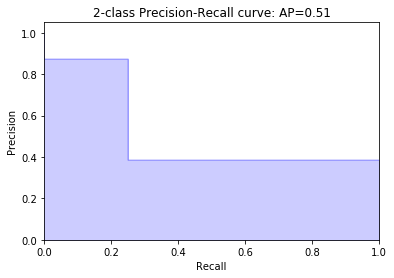

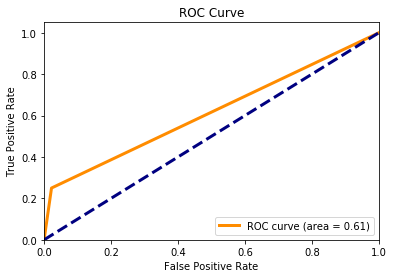

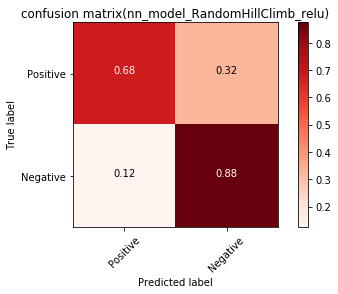

In [202]:
# BaseLine
nn_model_GradientDescent = mlrose.NeuralNetwork(hidden_nodes = [48], activation = 'relu',
                                 algorithm = 'gradient_descent', max_iters = 5000,
                                 bias = True, is_classifier = True, learning_rate = 0.0001,
                                 early_stopping = True, clip_max = 10, max_attempts = 5000)
t0 = time.time()
nn_model_GradientDescent.fit(X_train, Y_train)
print('train time:', time.time()-t0)
# Predict labels for train set and assess accuracy
y_train_pred = nn_model_GradientDescent.predict(X_train)
y_train_pred = np.asarray([y[0] for y in y_train_pred])

y_train_accuracy = accuracy_score(Y_train, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
t0 = time.time()
y_test_pred = nn_model_GradientDescent.predict(X_test)
print('test time:', time.time()-t0)
y_test_pred = np.asarray([y[0] for y in y_test_pred])

y_test_accuracy = accuracy_score(Y_test, y_test_pred)

print('Test accuracy: ', y_test_accuracy)
display_metrics('nn_model_GradientDescent', y_test_pred, Y_test)
plot_PR(y_test_pred, Y_test)
plot_ROC(y_test_pred, Y_test)
cnf_matrix = confusion_matrix(y_test_pred, Y_test)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='confusion matrix('+name+')')
plt.show()